<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Variable description</a></span></li><li><span><a href="#Importing-Tools-and-Loading-Dataset" data-toc-modified-id="Importing-Tools-and-Loading-Dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Importing Tools and Loading Dataset</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-Data-Types" data-toc-modified-id="Checking-Data-Types-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Checking Data Types</a></span></li></ul></li><li><span><a href="#Investigating-Outliers" data-toc-modified-id="Investigating-Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Investigating Outliers</a></span></li></ul></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#Investigate-linearity-assumption" data-toc-modified-id="Investigate-linearity-assumption-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Investigate linearity assumption</a></span></li><li><span><a href="#Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model" data-toc-modified-id="Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Interpret a Correlation Heatmap to Build a Baseline Model</a></span></li></ul></li><li><span><a href="#Outlier-Removal" data-toc-modified-id="Outlier-Removal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outlier Removal</a></span><ul class="toc-item"><li><span><a href="#Standardize-Data" data-toc-modified-id="Standardize-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Standardize Data</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model 3</a></span><ul class="toc-item"><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Checking-Normality" data-toc-modified-id="Checking-Normality-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Checking Normality</a></span></li></ul></li><li><span><a href="#Polynomial-Model" data-toc-modified-id="Polynomial-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Polynomial Model</a></span></li><li><span><a href="#Conclusions-and-Next-Steps" data-toc-modified-id="Conclusions-and-Next-Steps-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusions and Next Steps</a></span></li><li><span><a href="#Appendix:-Making-Predictions" data-toc-modified-id="Appendix:-Making-Predictions-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Appendix: Making Predictions</a></span></li></ul></div>

## Final Project Submission

* Student name: Alex Casey
* Student pace: DS Flex / 20 Week track
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: https://think-big-data.ghost.io/no-more-messy-data-tables/


## Business Understanding

For this project, I used regression modeling to analyze house sales in King County, which is located in the U.S. state of Washington. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city.

Not all home improvements are created equally, so how do you choose between remodeling your kitchen or adding wood floors? How much would adding a bedroom or bathroom actually increase your home value?

This project seeks to advise homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo.

### Variable description
Here are some brief explanations of the variables used in this project :



* **id** - unique identifier for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  # of Bedrooms
* **bathrooms** -  # of bathrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - house with waterfront view
* **view** - has been viewed (prior to being sold)
* **condition** - condition of house
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - year built
* **yr_renovated** - year when house was renovated
* **zipcode** - zipcode
* **lat** - latitude coordinate
* **long** - longitude coordinate
* **sqft_living15** - the square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - the square footage of the land lots of the nearest 15 neighbors
 

### Importing Tools and Loading Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import itertools as it
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


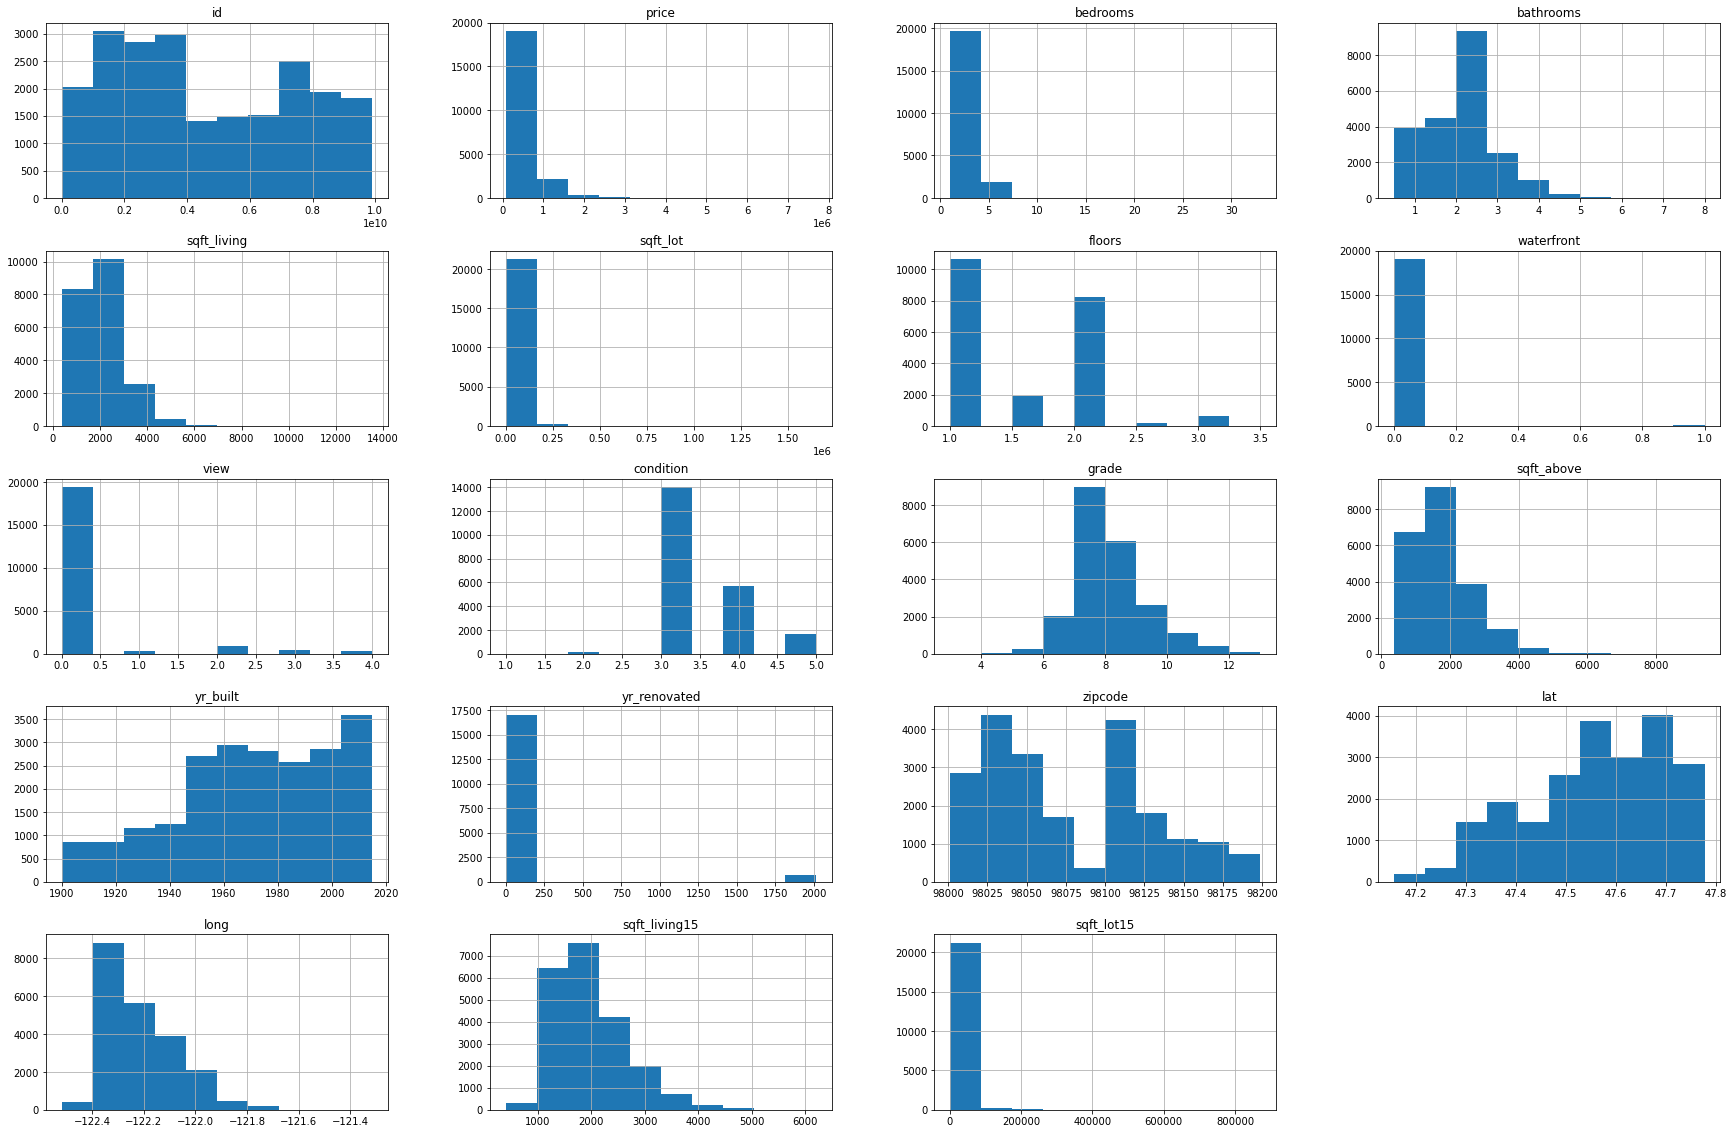

In [3]:
# Clearly we have categorical and continuous data
#plot the frequency of the columns
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

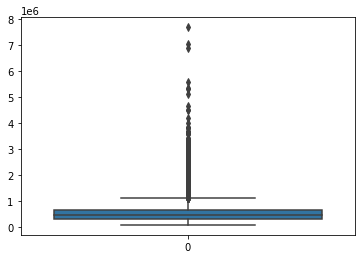

In [4]:
sns.boxplot(data=df['price'], orient='v')

In [5]:
# price, sqft_above, sqft_basement, sqft_living, sqft_lot are all continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values
# We can see that there is an increase in the number of houses built as time goes on. Most houses sold were built in the 2000s

## Data Preparation
To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

#### Checking Data Types
In the cell below, use the appropriate method to check the data type of each column.

In [6]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From description we can infer that

- Average price of house sold in King County is 540,088
- Max price of home sale is 7.7 million
- Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house having 33 Bedrooms
- Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

In [8]:
# over 21k records
df.shape

(21597, 21)

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The results shown above clearly show that 0 is the most common value for all three columns! In order to retain as much data as possible, we’ll fill the missing values of each column by randomly choosing a unique value given the appropriate weights. For example, a missing value in the waterfront column will be replaced by 0 with a 99% chance and 1 with a 1% chance:

In [10]:
def replace_missing(val, probs):
    if np.isnan(val):
        return np.random.choice(probs.index, p = probs)
    else:
        return val
for col in ["waterfront", "view", "yr_renovated"]:
    # get weights of unique values
    unique_p = df[col].value_counts(normalize = True)
    # apply function above
    df[col] = df[col].apply(replace_missing, args = (unique_p,))
    print("The number of missing values in {} is:".format(col), df[col].isna().sum())
print("--------------------------------------")
print("Missing values per column:")
# last check to see if there are missing values
df.isna().sum()

The number of missing values in waterfront is: 0
The number of missing values in view is: 0
The number of missing values in yr_renovated is: 0
--------------------------------------
Missing values per column:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# Numerical Data Stored as Strings
# we need to change the data type of sqft_basement because it's a string when
# it needs to be converted to a float
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# checking out the values to see if there are any symbols
# is the basement square footage really not known? Or is it a function of sqft_living?

df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [13]:
# we can see that sqft_living = sqft_above + sqft_basement
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


In [14]:
# make a copy to drop "?" values to perform boolean comparison
test_df = df.copy()
test_df = test_df[test_df.sqft_basement != '?']
# needed a separate line of code for '0.0' as .astype(float) would error
test_df.sqft_basement[test_df.sqft_basement == '0.0'] = 0
# now I can convert datatype of the whole set to float
test_df.sqft_basement = test_df.sqft_basement.astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

Now let's see if this relationship between the 3 variables is consistent throughout the entire dataset

In [15]:
(test_df.sqft_basement != test_df.sqft_living - test_df.sqft_above).sum()

0


Thus we can conclude that any row with a value of '?' in the sqft_basement column can be replaced by adding the data from sqft_living and sqft_above.

In [16]:
difference = (df.loc[df["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(df.loc[df["sqft_basement"] == '?', ["sqft_above"]]).values
df.loc[df["sqft_basement"] == '?', ["sqft_basement"]] = difference

In [17]:
#change the dtype to int64 to be consistent with the rest of the 'sqft' variables
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [18]:
# this allows the outlier code to run (can't have infite values)
#df.zipcode = df.zipcode.astype('category')
#df = df[np.isfinite(df['waterfront'])]
#df = df[np.isfinite(df['sqft_basement'])]

In [19]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We finally have all columns with their right data type! Now to apply some transformations

In [20]:
# converting columns to appropriate data type!
df.date = pd.to_datetime(df.date)
# I've decided to use the ceiling function for variables that 
# are discrete by nature but are floats
df.bathrooms = np.ceil(df.bathrooms).astype(int)
df.floors = np.ceil(df.floors).astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
# cannot convert float string to int directly
df.sqft_basement = df.sqft_basement.astype(float).astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Investigating Outliers

In [69]:
df.dtypes

price        float64
bedrooms     float64
bathrooms    float64
sqft_lot     float64
floors       float64
              ...   
98177          uint8
98178          uint8
98188          uint8
98198          uint8
98199          uint8
Length: 84, dtype: object

## Exploring the Data

<Figure size 720x720 with 0 Axes>

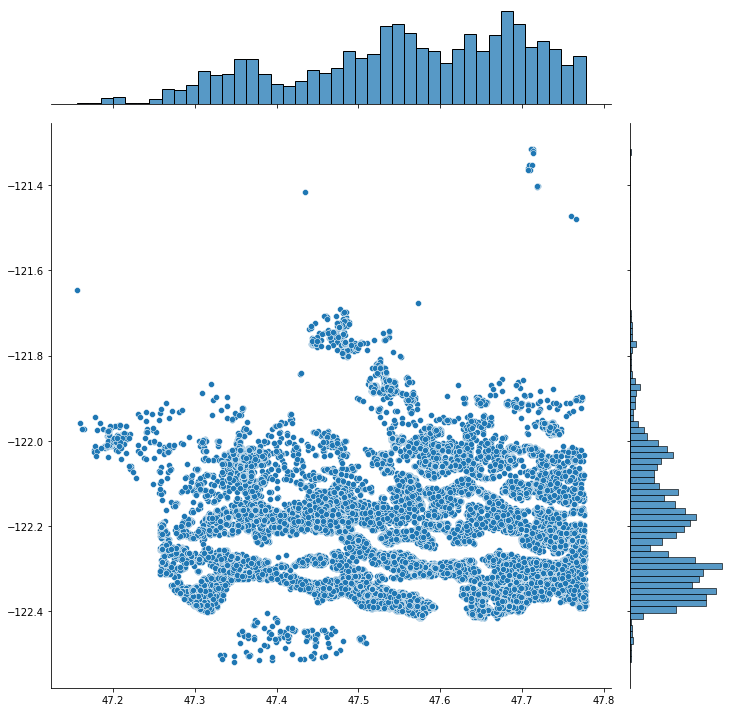

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [24]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

### Investigate linearity assumption

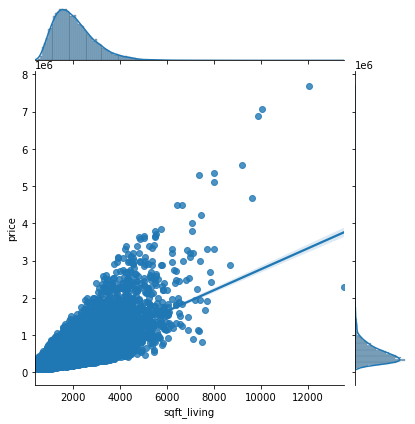

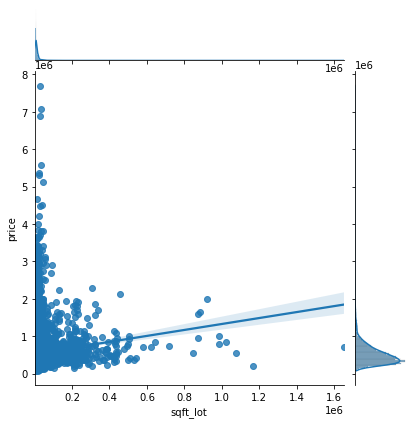

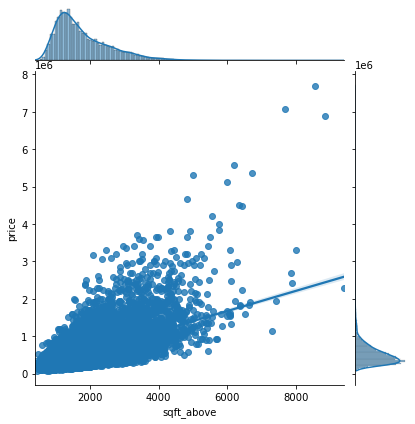

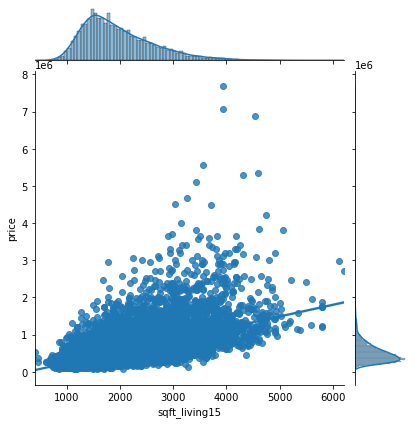

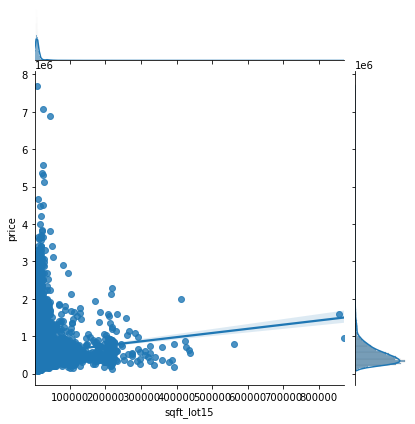

In [25]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

### Interpret a Correlation Heatmap to Build a Baseline Model

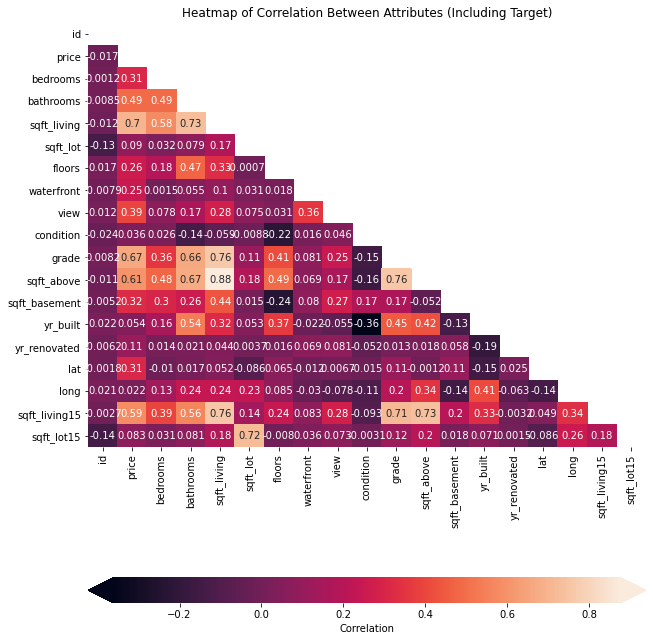

In [26]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [27]:
df.corr()
abs(df.corr()) >= 0.75
# Show all pairwise correlations above .75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [28]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['id', 'grade', 'sqft_living', 'sqft_lot15', 'yr_renovated'], axis = 1)
    return df

In [29]:
# Drop multicollinear features
df = drop_corrfeats(df)
df = df.drop(['date'], axis = 1)

In [30]:
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
0,221900.0,3,1,5650,1,0,0,3,1180,0,1955,98178,47.5112,-122.257,1340
1,538000.0,3,3,7242,2,0,0,3,2170,400,1951,98125,47.7210,-122.319,1690
2,180000.0,2,1,10000,1,0,0,3,770,0,1933,98028,47.7379,-122.233,2720
3,604000.0,4,3,5000,1,0,0,5,1050,910,1965,98136,47.5208,-122.393,1360
4,510000.0,3,2,8080,1,0,0,3,1680,0,1987,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,3,1131,3,0,0,3,1530,0,2009,98103,47.6993,-122.346,1530
21593,400000.0,4,3,5813,2,0,0,3,2310,0,2014,98146,47.5107,-122.362,1830
21594,402101.0,2,1,1350,2,0,0,3,1020,0,2009,98144,47.5944,-122.299,1020
21595,400000.0,3,3,2388,2,0,0,3,1600,0,2004,98027,47.5345,-122.069,1410


## Outlier Removal

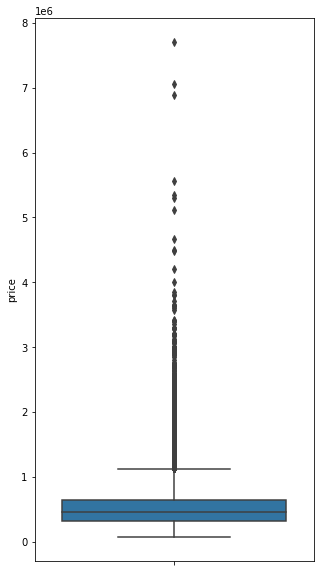

In [31]:
# creating boxplots to see the outliers in the price variable
# we can see we have many outliers above ~1.2 million

plt.figure(figsize=(5,10))
sns.boxplot(y=df['price']).set_title
plt.show()

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323000.0000
bedrooms              1.0000
bathrooms             1.0000
sqft_lot           5645.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             1.0000
sqft_above         1020.0000
sqft_basement       560.0000
yr_built             46.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
dtype: float64


In [41]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(df, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [42]:
#applying the above function on columns to find the total outliers in every feature
for i in df.columns:
    print('Total outliers in ', i)
    calc_interquartile(df, i)
    print()

Total outliers in  price
Lower outliers 0
Upper outliers 474
total outliers 474

Total outliers in  bedrooms
Lower outliers 196
Upper outliers 334
total outliers 530

Total outliers in  bathrooms
Lower outliers 0
Upper outliers 266
total outliers 266

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2419
total outliers 2419

Total outliers in  floors
Lower outliers 0
Upper outliers 7
total outliers 7

Total outliers in  waterfront
Lower outliers 0
Upper outliers 167
total outliers 167

Total outliers in  view
Lower outliers 0
Upper outliers 2119
total outliers 2119

Total outliers in  condition
Lower outliers 29
Upper outliers 0
total outliers 29

Total outliers in  sqft_above
Lower outliers 0
Upper outliers 610
total outliers 610

Total outliers in  sqft_basement
Lower outliers 0
Upper outliers 496
total outliers 496

Total outliers in  yr_built
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  zipcode


TypeError: Unordered Categoricals can only compare equality or not

Lower outliers 0
Upper outliers 474
total outliers 474
1055000.0 -153000.0


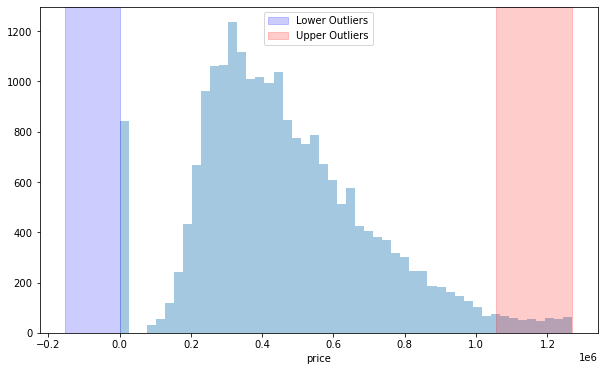

In [43]:
#plotting outliers graph for 'price' feature 
calc_interquartile(df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(df['price'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= df['price'].min(),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= df['price'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()


In [44]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

def z_score(df, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 1.5
    # calculating the mean of the passed column
    mean = np.mean(df[column])
    # calculating the standard deviation of the passed column
    std = np.std(df[column])
    for i in df[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 2719
1055000.0 -153000.0


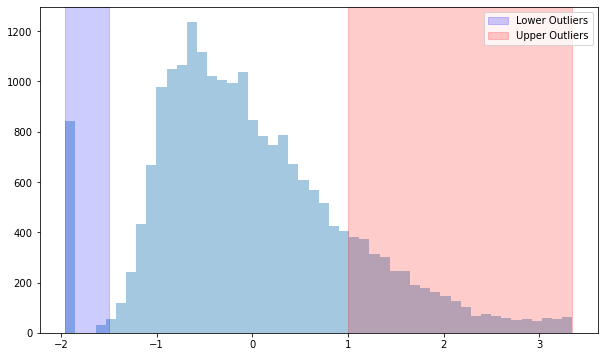

In [45]:
#plotting outliers graph for 'price' feature 
z_score(df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -1.5 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 1 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [46]:
#remove the outliers from price using zscore
dj=[]
for i in df.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
df['price'] = dj

x = df.drop(df[df['price'] == 0.0].index) 
x.shape

(18878, 15)

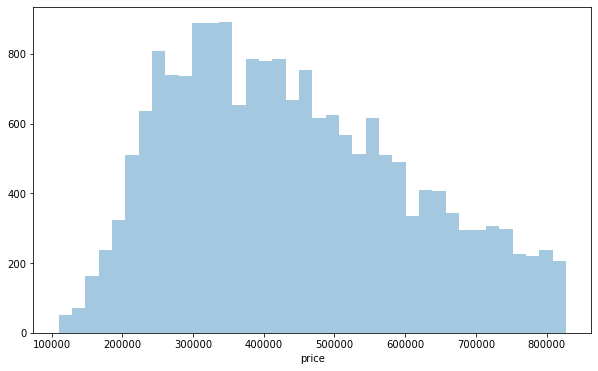

In [47]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

In [ ]:
#x = x[x['price']<=800000]

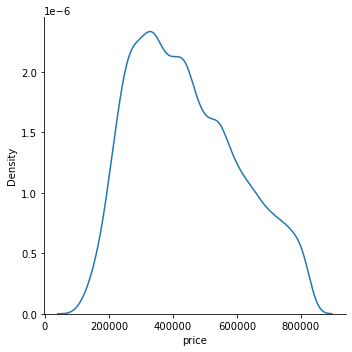

In [48]:
sns.displot(x, x="price", kind="kde")

### Standardize Data

In [50]:
df = x

In [51]:
# store mean and std for all log transformed variables
pre_standardization = []
# Standardize numeric columns
for column in df.select_dtypes(include=['int64', 'float64']):
    if column != 'price':
        result = [column]
        result.append(df[column].mean())
        result.append(df[column].std())
        pre_standardization.append(result)
        df[column] = (df[column] - df[column].mean()) / df[column].std()
df.head()
print(pre_standardization)

[['bedrooms', 3.2882720627185082, 0.8973135207498394], ['bathrooms', 2.311897446763428, 0.8486563559546978], ['sqft_lot', 13931.185400995868, 37439.14792861688], ['floors', 1.502383727089734, 0.5632807476111872], ['waterfront', 0.002966415933891302, 0.054385411542997614], ['view', 0.14116961542536285, 0.5744273528012013], ['condition', 3.4038563407140585, 0.6427660821739413], ['sqft_above', 1637.0862379489354, 659.3631860150517], ['sqft_basement', 252.35581099692763, 391.2113315444172], ['yr_built', 1970.6450895221951, 28.88246628320276], ['lat', 47.55186459370701, 0.14395533955990392], ['long', -122.21406097044164, 0.1431432583647183], ['sqft_living15', 1861.2289967157537, 556.3856286731291]]


In [ ]:
df.head()

In [ ]:
df.shape

One hot encoding zipcode

In [52]:
zips = pd.get_dummies(df.zipcode)
df = df.join(zips)
df.drop(['zipcode'], axis=1, inplace=True)

## Baseline Model

Building a baseline model

In [53]:
preprocessed = df

In [54]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

<AxesSubplot:xlabel='price', ylabel='Density'>

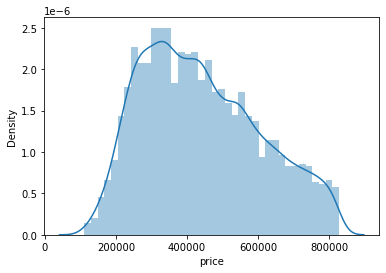

In [55]:
sns.distplot(y)

In [56]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     881.4
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:46:27   Log-Likelihood:            -2.3882e+05
No. Observations:               18878   AIC:                         4.778e+05
Df Residuals:                   18795   BIC:                         4.785e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.525e+05   1246.500    363.054      0.000     4.5e+05    4.55e+05
bedrooms      -4624.3619    710.522     -6.508      0.000   -6017.050   -3231.674
bathrooms      9326.0683    940.002      9.921      0.000    7483.580    1.12e+04
sqft_lot       1.099e+04    605.297     18.160      0.000    9805.927    1.22e+04
floors        -4507.0591    808.730     -5.573      0.000   -6092.242   -2921.876
waterfront     4693.7120    577.913      8.122      0.000    3560.951    5826.473
view            1.57e+04    605.093     25.942      0.000    1.45e+04    1.69e+04
condition       1.39e+04    620.116     22.417      0.000    1.27e+04    1.51e+04
sqft_above      7.81e+04   1091.226     71.574      0.000     7.6e+04    8.02e+04
sqft_basement  2.719e+04    766.613     35.465      0.000    2.57e+04    2.87e+04
yr_built      -2720.6102    863.012     -3.152      0.002   -4412.192   -1029.029
lat            3.174e+04   4588.977      6.916      0.000    2.27e+04    4.07e+04
long          -7284.3552   3218.524     -2.263      0.024   -1.36e+04    -975.758
sqft_living15   2.74e+04    899.091     30.474      0.000    2.56e+04    2.92e+04
98001         -1.211e+05   9012.118    -13.438      0.000   -1.39e+05   -1.03e+05
98002         -1.221e+05   9532.063    -12.810      0.000   -1.41e+05   -1.03e+05
98003         -1.179e+05   9292.840    -12.690      0.000   -1.36e+05   -9.97e+04
98004          2.585e+05   8860.753     29.172      0.000    2.41e+05    2.76e+05
98005          1.426e+05   7756.899     18.379      0.000    1.27e+05    1.58e+05
98006          9.402e+04   4753.767     19.777      0.000    8.47e+04    1.03e+05
98007          7.569e+04   7345.940     10.304      0.000    6.13e+04    9.01e+04
98008          6.753e+04   5726.216     11.794      0.000    5.63e+04    7.88e+04
98010         -2.792e+04   1.12e+04     -2.484      0.013      -5e+04   -5892.931
98011          -6.35e+04   8509.549     -7.462      0.000   -8.02e+04   -4.68e+04
98014         -7.597e+04   1.16e+04     -6.534      0.000   -9.88e+04   -5.32e+04
98019         -1.065e+05   1.02e+04    -10.487      0.000   -1.26e+05   -8.66e+04
98022         -8.617e+04   1.27e+04     -6.770      0.000   -1.11e+05   -6.12e+04
98023         -1.363e+05   9460.422    -14.405      0.000   -1.55e+05   -1.18e+05
98024         -1.423e+04   1.14e+04     -1.244      0.213   -3.66e+04    8183.053
98027          4.139e+04   5715.663      7.242      0.000    3.02e+04    5.26e+04
98028         -7.788e+04   7927.747     -9.824      0.000   -9.34e+04   -6.23e+04
98029           8.55e+04   6504.979     13.144      0.000    7.28e+04    9.83e+04
98030         -1.241e+05   7621.944    -16.284      0.000   -1.39e+05   -1.09e+05
98031         -1.252e+05   6704.343    -18.669      0.000   -1.38e+05   -1.12e+05
98032          -1.35e+05   9158.333    -14.739   

Looking at the F-test, testing the null hypothesis that nothing is going on here (in other words, that all of the coefficients on your independent variables are equal to zero). We reject this null hypothesis with extremely high confidence - 100% in fact.
"""

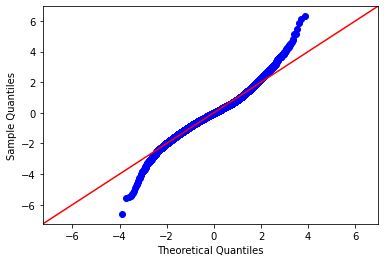

In [57]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

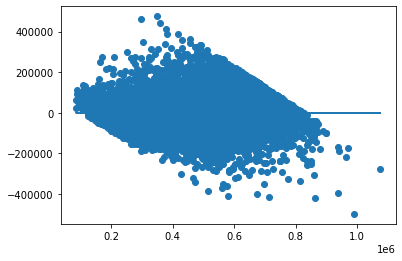

In [58]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X))])

## Model 2

At this point, we'll also drop any continuous variables that have a r-sq < 0.01 because those variables add so little that they are negligible and are over complicating our model. Finally, we'll drop one column of each categorical variable. This will help us avoid redundancy.

In [59]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [60]:
data = X.join(y)

In [61]:
data = X.join(y)
for var in df.select_dtypes(include=['int64', 'float64']):
    formula = 'price~' + str(var)
    print(formula)
    model = smf.ols(formula=formula, data=data)
    reg = model.fit()
    print('r-sq: ', reg.rsquared)
    # Drop variables with r-squared < 0.01
    if reg.rsquared < 0.01:
        X.drop(var, axis=1, inplace=True)
        print('dropped')
    print('-------------------------')

X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)

price~price
r-sq:  1.0
-------------------------
price~bedrooms
r-sq:  0.060552749625044644
-------------------------
price~bathrooms
r-sq:  0.14587657788507158
-------------------------
price~sqft_lot
r-sq:  0.006824328186628592
dropped
-------------------------
price~floors
r-sq:  0.06662078321935239
-------------------------
price~waterfront
r-sq:  0.0011869963771362624
dropped
-------------------------
price~view
r-sq:  0.0325469678134469
-------------------------
price~condition
r-sq:  0.0007081603182956808
dropped
-------------------------
price~sqft_above
r-sq:  0.20228700089458462
-------------------------
price~sqft_basement
r-sq:  0.04299560535121061
-------------------------
price~yr_built
r-sq:  0.003254475039709326
dropped
-------------------------
price~lat
r-sq:  0.2118980293908257
-------------------------
price~long
r-sq:  0.006475872776439795
dropped
-------------------------
price~sqft_living15
r-sq:  0.2465156966428934
-------------------------


In [62]:
# refit model
X_int = sm.add_constant(X)
model_2 = sm.OLS(y, X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     878.5
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:47:54   Log-Likelihood:            -2.3932e+05
No. Observations:               18878   AIC:                         4.788e+05
Df Residuals:                   18800   BIC:                         4.794e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.025e+05   6238.160     96.587      0.000     5.9e+05    6.15e+05
bedrooms      -3865.0685    722.577     -5.349      0.000   -5281.385   -2448.752
bathrooms      5582.0917    862.781      6.470      0.000    3890.963    7273.220
floors        -7471.4959    810.051     -9.223      0.000   -9059.268   -5883.723
view           1.762e+04    606.759     29.048      0.000    1.64e+04    1.88e+04
sqft_above     8.029e+04   1112.021     72.203      0.000    7.81e+04    8.25e+04
sqft_basement  3.021e+04    778.011     38.824      0.000    2.87e+04    3.17e+04
lat            2.746e+04   4698.164      5.845      0.000    1.83e+04    3.67e+04
sqft_living15  2.591e+04    918.568     28.207      0.000    2.41e+04    2.77e+04
98001         -2.778e+05    1.3e+04    -21.342      0.000   -3.03e+05   -2.52e+05
98002         -2.746e+05   1.35e+04    -20.286      0.000   -3.01e+05   -2.48e+05
98003         -2.733e+05    1.3e+04    -20.990      0.000   -2.99e+05   -2.48e+05
98004          1.117e+05   1.05e+04     10.638      0.000    9.12e+04    1.32e+05
98005         -3504.1127   9545.869     -0.367      0.714   -2.22e+04    1.52e+04
98006         -5.206e+04   7635.452     -6.818      0.000    -6.7e+04   -3.71e+04
98007         -7.327e+04   9013.206     -8.129      0.000   -9.09e+04   -5.56e+04
98008         -8.346e+04   7381.329    -11.307      0.000   -9.79e+04    -6.9e+04
98010         -1.798e+05   1.41e+04    -12.800      0.000   -2.07e+05   -1.52e+05
98011         -2.127e+05   8528.057    -24.944      0.000   -2.29e+05   -1.96e+05
98014         -2.262e+05   9012.583    -25.098      0.000   -2.44e+05   -2.09e+05
98019         -2.628e+05   8349.925    -31.479      0.000   -2.79e+05   -2.46e+05
98022         -2.349e+05   1.61e+04    -14.568      0.000   -2.67e+05   -2.03e+05
98023         -2.884e+05   1.29e+04    -22.426      0.000   -3.14e+05   -2.63e+05
98024         -1.646e+05   1.12e+04    -14.669      0.000   -1.87e+05   -1.43e+05
98027         -1.125e+05   8012.924    -14.037      0.000   -1.28e+05   -9.68e+04
98028         -2.236e+05   7906.466    -28.283      0.000   -2.39e+05   -2.08e+05
98029         -7.914e+04   7634.432    -10.366      0.000   -9.41e+04   -6.42e+04
98030         -2.838e+05   1.17e+04    -24.281      0.000   -3.07e+05   -2.61e+05
98031         -2.794e+05   1.08e+04    -25.981      0.000      -3e+05   -2.58e+05
98032         -2.853e+05   1.26e+04    -22.582      0.000    -3.1e+05   -2.61e+05
98033           -5.1e+04   7126.914     -7.156      0.000    -6.5e+04    -3.7e+04
98034          -1.72e+05   6814.797    -25.242      0.000   -1.85e+05   -1.59e+05
98038         -2.518e+05   1.11e+04    -22.694      0.000   -2.73e+05    -2.3e+05
98039          2.136e+05   7.79e+04      2.744      0.006     6.1e+04    3.66e+05
98040          6.309e+04    1.1e+04      5.741   

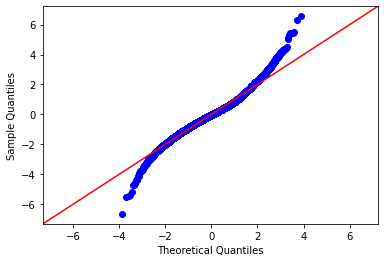

In [63]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

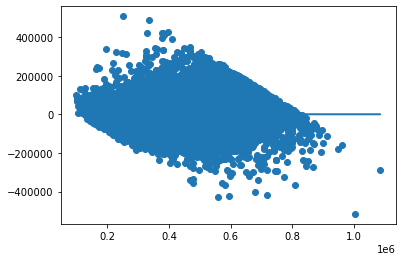

In [64]:
plt.scatter(model_2.predict(X_int), model_2.resid)
plt.plot(model_2.predict(X_int), [0 for i in range(len(X))])

## Model 3

In [65]:
y_log = np.log(y)

In [66]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [67]:
# refit model
X_int = sm.add_constant(X)
model_final = sm.OLS(y,X_int).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     881.4
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:48:15   Log-Likelihood:            -2.3882e+05
No. Observations:               18878   AIC:                         4.778e+05
Df Residuals:                   18795   BIC:                         4.785e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.525e+05   1246.500    363.054      0.000     4.5e+05    4.55e+05
bedrooms      -4624.3619    710.522     -6.508      0.000   -6017.050   -3231.674
bathrooms      9326.0683    940.002      9.921      0.000    7483.580    1.12e+04
sqft_lot       1.099e+04    605.297     18.160      0.000    9805.927    1.22e+04
floors        -4507.0591    808.730     -5.573      0.000   -6092.242   -2921.876
waterfront     4693.7120    577.913      8.122      0.000    3560.951    5826.473
view            1.57e+04    605.093     25.942      0.000    1.45e+04    1.69e+04
condition       1.39e+04    620.116     22.417      0.000    1.27e+04    1.51e+04
sqft_above      7.81e+04   1091.226     71.574      0.000     7.6e+04    8.02e+04
sqft_basement  2.719e+04    766.613     35.465      0.000    2.57e+04    2.87e+04
yr_built      -2720.6102    863.012     -3.152      0.002   -4412.192   -1029.029
lat            3.174e+04   4588.977      6.916      0.000    2.27e+04    4.07e+04
long          -7284.3552   3218.524     -2.263      0.024   -1.36e+04    -975.758
sqft_living15   2.74e+04    899.091     30.474      0.000    2.56e+04    2.92e+04
98001         -1.211e+05   9012.118    -13.438      0.000   -1.39e+05   -1.03e+05
98002         -1.221e+05   9532.063    -12.810      0.000   -1.41e+05   -1.03e+05
98003         -1.179e+05   9292.840    -12.690      0.000   -1.36e+05   -9.97e+04
98004          2.585e+05   8860.753     29.172      0.000    2.41e+05    2.76e+05
98005          1.426e+05   7756.899     18.379      0.000    1.27e+05    1.58e+05
98006          9.402e+04   4753.767     19.777      0.000    8.47e+04    1.03e+05
98007          7.569e+04   7345.940     10.304      0.000    6.13e+04    9.01e+04
98008          6.753e+04   5726.216     11.794      0.000    5.63e+04    7.88e+04
98010         -2.792e+04   1.12e+04     -2.484      0.013      -5e+04   -5892.931
98011          -6.35e+04   8509.549     -7.462      0.000   -8.02e+04   -4.68e+04
98014         -7.597e+04   1.16e+04     -6.534      0.000   -9.88e+04   -5.32e+04
98019         -1.065e+05   1.02e+04    -10.487      0.000   -1.26e+05   -8.66e+04
98022         -8.617e+04   1.27e+04     -6.770      0.000   -1.11e+05   -6.12e+04
98023         -1.363e+05   9460.422    -14.405      0.000   -1.55e+05   -1.18e+05
98024         -1.423e+04   1.14e+04     -1.244      0.213   -3.66e+04    8183.053
98027          4.139e+04   5715.663      7.242      0.000    3.02e+04    5.26e+04
98028         -7.788e+04   7927.747     -9.824      0.000   -9.34e+04   -6.23e+04
98029           8.55e+04   6504.979     13.144      0.000    7.28e+04    9.83e+04
98030         -1.241e+05   7621.944    -16.284      0.000   -1.39e+05   -1.09e+05
98031         -1.252e+05   6704.343    -18.669      0.000   -1.38e+05   -1.12e+05
98032          -1.35e+05   9158.333    -14.739   

In [68]:
print(model_final.params.sort_values(ascending=False))

const    452546.302750
98039    373638.227813
98004    258486.623415
98040    204264.400533
98109    193739.917607
             ...      
98168   -123327.452423
98030   -124113.297818
98031   -125163.903938
98032   -134980.464872
98023   -136273.677686
Length: 84, dtype: float64


### Interpretation

Adj. R-squared describes the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, this model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. This is not the case here, as they are equal.

P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.269 for lat is saying there is a 26.9% chance the Latitude variable has no affect on the dependent variable, home Price, and our results are produced by chance.

Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

A change of 1 standard deviation in X is associated with a change of β standard deviations of Y.

The linear model coefficients can be interpreted as the change in the response (i.e. dependent variable) for a 1 standard deviation increase in the predictor (i.e. independent variable). A 1 standard deviation increase in Total N in soil is associated with a decrease (because of the negative coefficient value) in the vegetation change index by ~0.03 units.

Both dependent/response variable and independent/predictor variable(s) are log-transformed. Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. Example: the coefficient of sqft_above is 0.2106. For every 1% increase in the independent variable, our dependent variable (price) increases by about 0.21%. For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100. Example: For every 20% increase in the independent variable, our dependent variable increases by about (1.20^ 0.2106 – 1) * 100 = 3.9 percent.

### Checking Normality

In [ ]:
fig = sm.graphics.qqplot(model_final.resid, dist=stats.norm, line='45', fit=True)

The residuals for this model seem to be mostly normally distributed. The tails of the qqplot imply that there are some more outliers that could be eliminated in order to improve the accuracy of the model.

In [ ]:
plt.scatter(model_final.predict(X_int), model_final.resid)
plt.plot(model_final.predict(X_int), [0 for i in range(len(X))])

If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

## Polynomial Model

## Conclusions and Next Steps

1. **Location, location, location**
* It's become an almost hackneyed phrase, but it still has meaning
* Where a home is located is the most important factor in it's value -- both now and in the future.




Finally, we built a model that is very predictive of price with a R-squared of 0.989. The final model included 79 features, most of which are dummy variables for zipcodes. 

## Appendix: Making Predictions

In [ ]:
X = x.drop('price',axis =1).values
y = x['price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [ ]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, x.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [ ]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

In [ ]:
df1